In [103]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [104]:
# Reading prepared data into a dataframe.

df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.drop("% of Total", axis = 'columns',inplace = True)
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Urban Population,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,,
1990-01-01,76.897,1990.0,1.0,40361.000000,1.599172e+08,7.0,119.1,5.4,119.1,8.23,187966119.0,93347.0,61500.0,15.487,12.284476
1990-02-01,77.053,1990.0,2.0,40368.000000,1.600262e+08,7.6,119.0,5.3,119.0,8.24,187966119.0,93347.0,61500.0,15.487,12.284476
1990-03-01,77.201,1990.0,3.0,40375.000000,1.601352e+08,7.8,119.6,5.2,119.6,8.28,187966119.0,93347.0,61500.0,15.487,12.284476
1990-04-01,77.278,1990.0,4.0,40382.000000,1.602441e+08,8.3,120.1,5.4,120.1,8.26,187966119.0,93347.0,61500.0,15.487,12.284476
1990-05-01,77.297,1990.0,5.0,40343.333333,1.603531e+08,8.2,120.1,5.4,120.1,8.18,187966119.0,93347.0,61500.0,15.487,12.284476


We don't need the month and year columns for our analysis. So, let's drop these colums.

In [105]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

#### Analysis

Let's look at the correlation among the variables.

In [106]:
# Correlation
matrix = df.corr()
matrix

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Urban Population,Num_Households,Income,Subsidy,old_percent
CSUSHPISA,1.000000,0.944204,0.871630,0.201099,0.943537,-0.195653,0.943537,-0.580490,0.903481,0.911646,0.858403,0.920549,0.838947
Per_Capita_GDP,0.944204,1.000000,0.967409,0.076993,0.908084,-0.172354,0.908084,-0.678602,0.983419,0.982406,0.871111,0.923245,0.800450
Working_Population,0.871630,0.967409,1.000000,0.116915,0.844706,0.002505,0.844706,-0.775878,0.984209,0.986163,0.754631,0.894036,0.705988
Houses,0.201099,0.076993,0.116915,1.000000,0.230654,0.158304,0.230654,0.033267,0.080103,0.100377,-0.018779,0.169013,0.079662
CPI,0.943537,0.908084,0.844706,0.230654,1.000000,-0.104863,1.000000,-0.627614,0.899963,0.900874,0.785033,0.954369,0.913316
UNRATE,-0.195653,-0.172354,0.002505,0.158304,-0.104863,1.000000,-0.104863,-0.397029,-0.045354,-0.044270,-0.380213,-0.001944,-0.145765
Cons_Materials,0.943537,0.908084,0.844706,0.230654,1.000000,-0.104863,1.000000,-0.627614,0.899963,0.900874,0.785033,0.954369,0.913316
FEDFUNDS,-0.580490,-0.678602,-0.775878,0.033267,-0.627614,-0.397029,-0.627614,1.000000,-0.759056,-0.763540,-0.392369,-0.716376,-0.539040
Urban Population,0.903481,0.983419,0.984209,0.080103,0.899963,-0.045354,0.899963,-0.759056,1.000000,0.997021,0.822747,0.943515,0.808278
Num_Households,0.911646,0.982406,0.986163,0.100377,0.900874,-0.044270,0.900874,-0.763540,0.997021,1.000000,0.813443,0.941967,0.808447


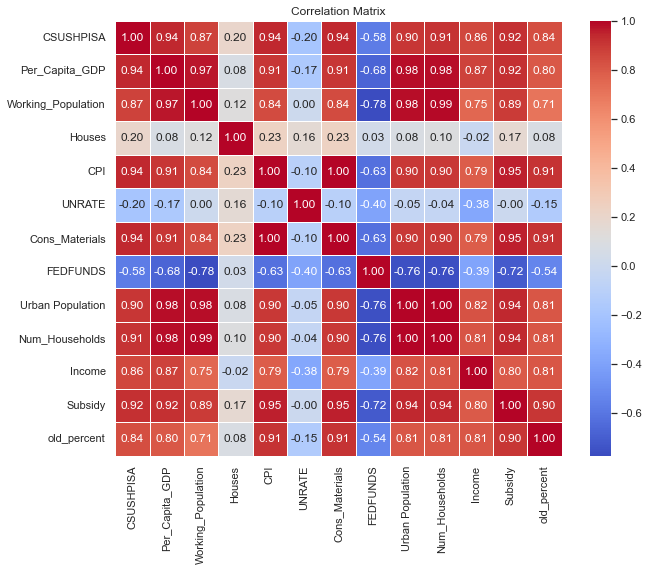

In [107]:
import seaborn as sns
# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [108]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

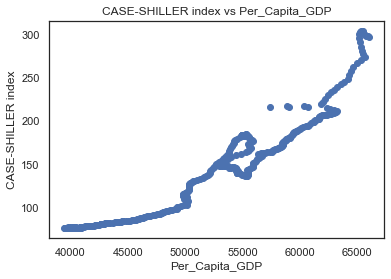

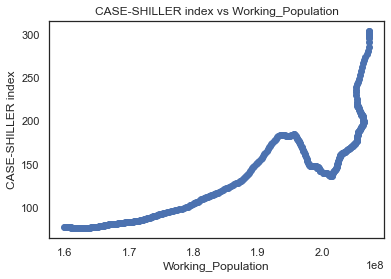

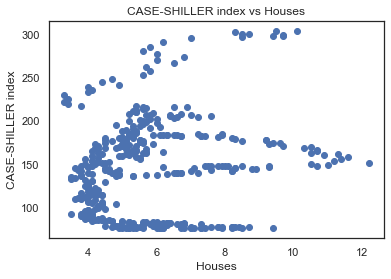

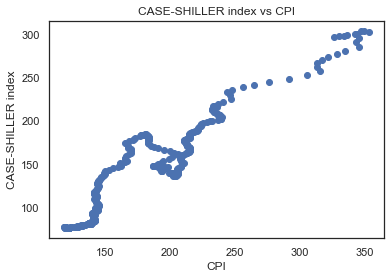

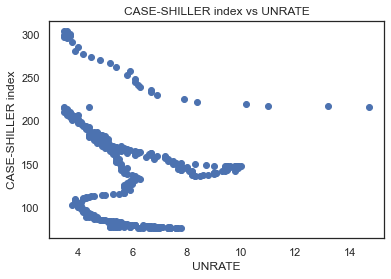

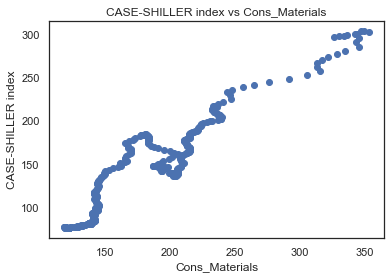

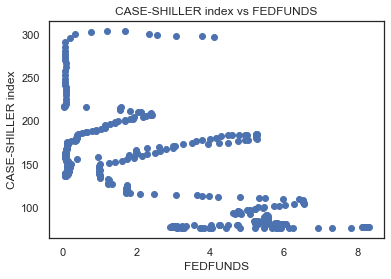

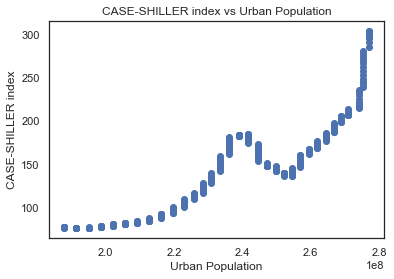

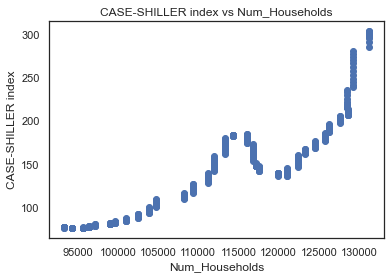

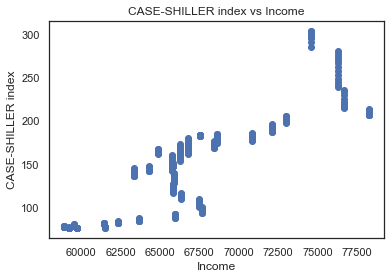

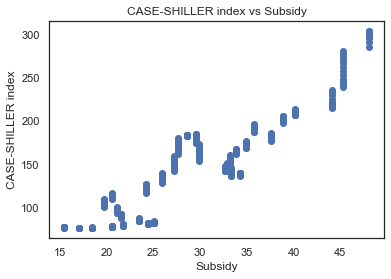

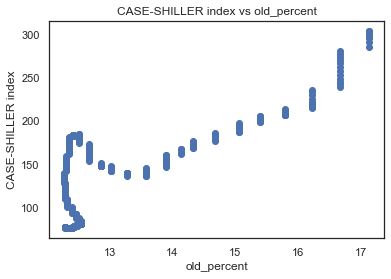

In [109]:
# Plotting scatter plots of the CASE-SHILLER index vs features
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

The examination of both the correlation matrix and scatter plots has yielded insightful conclusions:

Unemployment Rate: Exhibits a logical negative correlation with home prices, aligning with expectations.

Number of New Houses: Surprisingly, almost zero correlation suggests that the quantity of newly built houses might not exert a significant downward pressure on prices.

Impact of the Great Recession: Evident across various plots, indicating a lasting influence on the housing market.

Interest Rates: Slightly negatively impact home prices.

Other Variables: Demonstrate a positive correlation with home prices, implying a consistent upward trend.

Observing the correlation matrix, it's apparent that certain pairs of independent variables exhibit high correlation. To address multicollinearity, we opt to eliminate one column from each correlated pair. The criterion for elimination is based on the variable's lower correlation with the target.

In [110]:
# Dropping multicollinearity columns
mult_cols = ["Working_Population", "CPI", "Urban Population", "Num_Households", 
             "Subsidy", "old_percent", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df
X.head()

,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS
DATE,,,,
1990-01-01,40361.000000,7.0,5.4,8.23
1990-02-01,40368.000000,7.6,5.3,8.24
1990-03-01,40375.000000,7.8,5.2,8.28
1990-04-01,40382.000000,8.3,5.4,8.26
1990-05-01,40343.333333,8.2,5.4,8.18


### Model Building

In [111]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)


In [112]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [113]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9093899219456495


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [114]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 201.68475813238632
The coefficient for Houses is 31.068343346812725
The coefficient for UNRATE is -2.391614202836484
The coefficient for FEDFUNDS is 18.56562693996869


In [115]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  31.425900783692242


Using Rndom Forest for more accurate prediction 

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train,y_train)
y_pred3 = rf_random.predict(X_valid)

In [117]:
score = r2_score(y_pred3, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9949175715718942


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

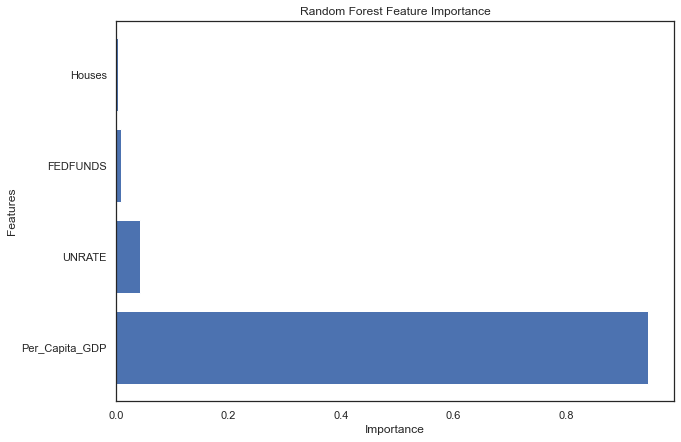

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is RandomForestRegressor instance
def feature(df, model):
    feat = pd.DataFrame(columns=['feature', 'importance'])
    
    # If df is a NumPy array, get the feature names from indices
    feat['feature'] = df.columns
    
    feat['importance'] = model.feature_importances_
    return feat.sort_values(by='importance', ascending=False)


importances = feature(df, rf_random)

# Plotting the feature importances
plt.figure(figsize=(10, 7))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


Using XGBoost

In [120]:
import xgboost as xgb
from xgboost import XGBRegressor
xg_random = XGBRegressor(n_estimators=100, random_state=42)
xg_random.fit(X_train,y_train)
y_pred4 = xg_random.predict(X_valid)
score = r2_score(y_pred4, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9845445024624252


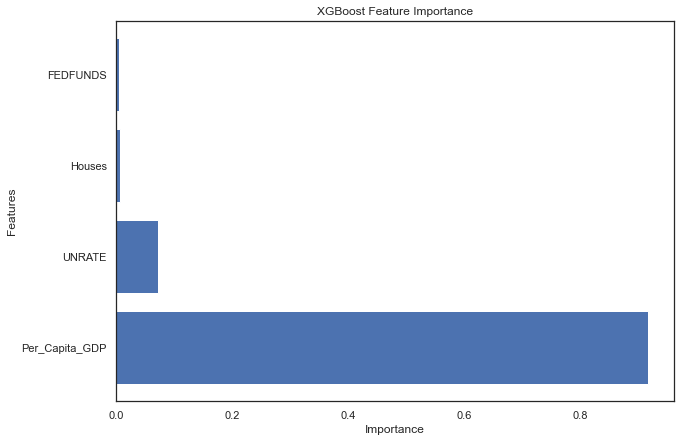

In [121]:
importances = feature(df, xg_random)

# Plotting the feature importances
plt.figure(figsize=(10, 7))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()


These results show that the importance of features in US House Price Prediction and validates with the result of Linear Regression.

Since most variables tend to increase with time, it is anticipated that they will exhibit high correlation. Rather than relying solely on a linear model, we can effectively assess the influence of variables on the home price index by directly examining scatter plots.

A few variables that could have been studied are below.

1. Net-immigration (It is supposed to have a positive impact. No suitable data could be found)
2. Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)
3. Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)
4. Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)
5. Tax Rate (Too many brackets (7) and could not analyse due to time)
6. Number of active listings (Data prior to 2017 was not found)